In [1]:
#!/usr/bin/env python3

import os, sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl


try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass
delphesDir = os.path.abspath("./DelphesLLP")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT


ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')



Welcome to JupyROOT 6.30/06


True

## Read events

In [2]:
# file = 'dijet_test.root'
file = 'pp2dijet/Events/run_01/dijet_pT20_delphes_events.root'

In [3]:
def getJetInfo(jets,etamax=2.5):
    
    pT1,pT2 = 0.0,0.0
    jets = [j for j in jets if abs(j.Eta) < etamax]
    nj = len(jets)
    jets = sorted(jets, key=lambda j: j.PT, reverse=True)
    if nj > 0:
        pT1 = jets[0].PT
    if nj > 1:
        pT2 = jets[1].PT
    return [nj,pT1,pT2]


### Get jet pT

In [4]:
f = ROOT.TFile(file,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()
data = []
data_truth = []
data_parton = []
for ievt in range(nevts):
    tree.GetEntry(ievt)

    # Parton-level
    parton_final = [ptc for ptc in tree.Particle if ptc.Status == 23]
    data_parton.append(getJetInfo(parton_final))
    
    # Truth-level
    data_truth.append(getJetInfo(tree.GenJet))

    # Detector-level
    data.append(getJetInfo(tree.Jet))


f.Close()
data = np.array(data)
data_truth = np.array(data_truth)
data_parton = np.array(data_parton)

# Plot jet pT

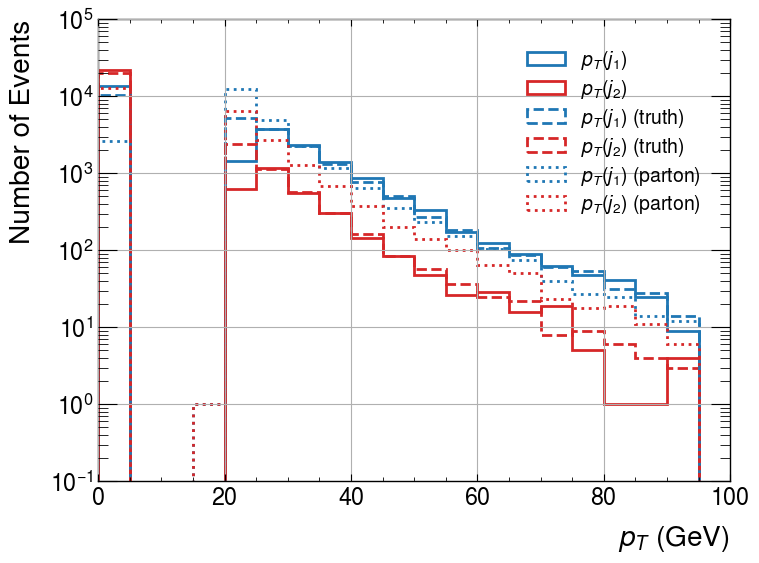

In [5]:
bins = np.arange(0.,100.,5.)
color_j1 = 'tab:blue'
color_j2 = 'tab:red'
plt.hist(data[:,1],bins=bins,color=color_j1,
             histtype='step',
             label=r'$p_T(j_1)$',linewidth=2)
plt.hist(data[:,2],bins=bins,color=color_j2,
             histtype='step',
             label=r'$p_T(j_2)$',linewidth=2)

plt.hist(data_truth[:,1],bins=bins,color=color_j1,
             histtype='step',
             label=r'$p_T(j_1)$ (truth)',linewidth=2,linestyle='dashed')
plt.hist(data_truth[:,2],bins=bins,color=color_j2,
             histtype='step',
             label=r'$p_T(j_2)$ (truth)',linewidth=2,linestyle='dashed')

plt.hist(data_parton[:,1],bins=bins,color=color_j1,
             histtype='step',
             label=r'$p_T(j_1)$ (parton)',linewidth=2,linestyle='dotted')
plt.hist(data_parton[:,2],bins=bins,color=color_j2,
             histtype='step',
             label=r'$p_T(j_2)$ (parton)',linewidth=2,linestyle='dotted')
plt.yscale('log')
plt.xlabel(r'$p_T$ (GeV)')
plt.ylabel('Number of Events')
# plt.vlines(x=[10.,25.,35.],ymin=1e-5,ymax=1,linestyles='dashed',colors='red')
plt.xlim(0.,100)
# plt.ylim(1e-4,1)
plt.legend(framealpha=1.0)
plt.grid()
plt.show()

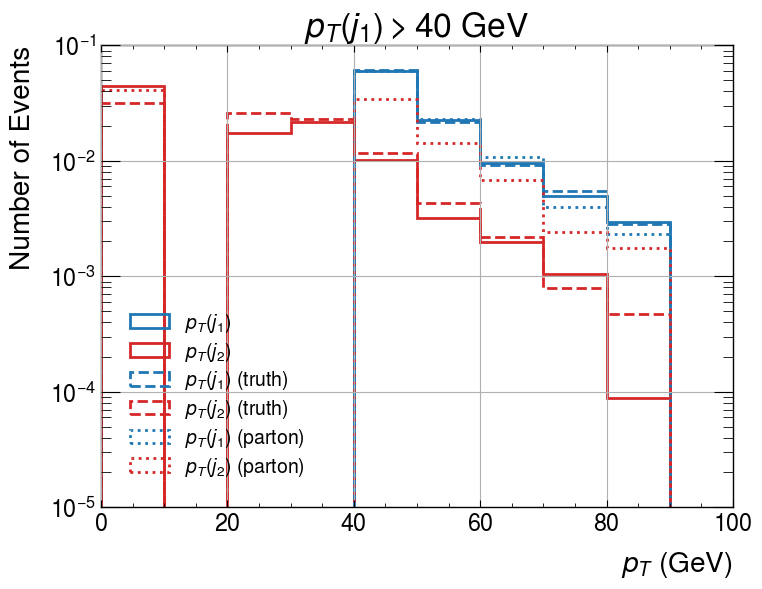

In [6]:
bins = np.arange(0.,100.,10.)
data1 = data[data[:,1]>40.0]
data_truth1 = data_truth[data_truth[:,1]>40.0]
data_parton1 = data_parton[data_parton[:,1]>40.0]

plt.hist(data1[:,1],bins=bins,color=color_j1,
             histtype='step',density=True,
             label=r'$p_T(j_1)$',linewidth=2)
plt.hist(data1[:,2],bins=bins,color=color_j2,
             histtype='step',density=True,
             label=r'$p_T(j_2)$',linewidth=2)

plt.hist(data_truth1[:,1],bins=bins,color=color_j1,
             histtype='step',density=True,
             label=r'$p_T(j_1)$ (truth)',linewidth=2,linestyle='dashed')
plt.hist(data_truth1[:,2],bins=bins,color=color_j2,
             histtype='step',density=True,
             label=r'$p_T(j_2)$ (truth)',linewidth=2,linestyle='dashed')

plt.hist(data_parton1[:,1],bins=bins,color=color_j1,
             histtype='step',density=True,
             label=r'$p_T(j_1)$ (parton)',linewidth=2,linestyle='dotted')
plt.hist(data_parton1[:,2],bins=bins,color=color_j2,
             histtype='step',density=True,
             label=r'$p_T(j_2)$ (parton)',linewidth=2,linestyle='dotted')
plt.yscale('log')
plt.xlabel(r'$p_T$ (GeV)')
plt.ylabel('Number of Events')
# plt.vlines(x=[10.,25.,35.],ymin=1e-5,ymax=1,linestyles='dashed',colors='red')
plt.xlim(0.,100)
# plt.ylim(1e-4,1)
plt.legend(framealpha=1.0)
plt.title(r'$p_T(j_1) > 40$ GeV')
plt.grid()
plt.show()

In [10]:
len(data1[data1[:,2] >40.])/len(data1),len(data_truth1[data_truth1[:,2] >40.])/len(data_truth1),len(data_parton1[data_parton1[:,2] >40.])/len(data_parton1)

(0.1726086956521739, 0.20341328413284132, 0.6018359150889271)